# LDA Projection

<font color='blue'>Step 14</font>

In [1]:
# Mount Google drive and cd to working folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/Learning/EIE4105/lab2/python/

Mounted at /content/drive
/content/drive/My Drive/Learning/EIE4105/lab2/python


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eig_vectors = None
    
    def fit_transform(self, X, y):        
        """
        To find the LDA projection matrix and project X to a low-dim space
        """
        height, width = X.shape
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)
        scatter_t = np.cov(X.T)*(height - 1)
        scatter_w = 0       #scatter_w matrix denotes the intra-class covariance
       
        for i in range(num_classes):
            class_items = np.flatnonzero(y == unique_classes[i])
            scatter_w = scatter_w + np.cov(X[class_items].T) * (len(class_items)-1)
        
        scatter_b = scatter_t - scatter_w       #scatter_b is the inter-class covariance matrix
        
        eig_values, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
        pc = X.dot(eig_vectors[:,::-1][:,:self.n_components])       #The first n_components are selected using the slicing operation
        
        # If n_components is equal to 2, we plot the two components, 
        # considering each vector as one axis
        if self.n_components == 2:
            if y is None:
                plt.scatter(pc[:,0],pc[:,1])
            else:
                colors = ['r','g','b']
                labels = np.unique(y)
                for color, label in zip(colors, labels):
                    class_data = pc[np.flatnonzero(y==label)]
                    plt.scatter(class_data[:,0],class_data[:,1],c=color)
            plt.show()
        return pc, eig_vectors, eig_values

In [4]:
# Load 100 training samples
from mnist import load_SampleMnist
nSamples = 100
trainpath = '../../lab1/data/noisy_train_digits.mat'
testpath = '../../lab1/data/noisy_test_digits.mat'
train_data, train_labels, test_data, test_labels = load_SampleMnist(trainpath,testpath,nSamples)

In [5]:
LDA_object = LDA(n_components=9)
Y, eig_vectors, eig_values = LDA_object.fit_transform(train_data,train_labels)
eig_vectors = eig_vectors[:, np.argsort(-eig_values)]
eig_vectors = eig_vectors[:, 0:9]
print(eig_vectors.shape)

(784, 9)


<font color='blue'>Plot the projected vectors in Y on the first 3 PCs</font>

In [6]:
import scipy.io
# Load dataset
data = scipy.io.loadmat('../../lab1/data/noisy_train_digits.mat') 

In [7]:
# Generate labels with numbers 0, 1, 2
data_0_label = np.zeros(len(data['trainData'][0][0]))
data_1_label = np.ones(len(data['trainData'][1][0]))
data_2_label = np.full(len(data['trainData'][2][0]),2)

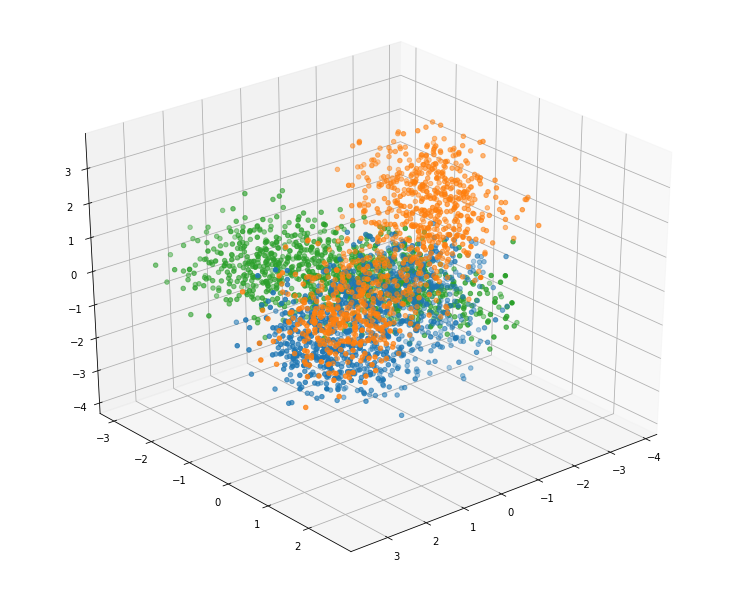

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, elev=-140, azim=100)

# Perform LDA with 3 components
LDA_object = LDA(n_components=3)

# Reduce the dimensions of the numbers 0, 1, and 2
data_0, eig_vectors_0, eig_values_0 = LDA_object.fit_transform(data['trainData'][0][0], data_0_label)
data_1, eig_vectors_1, eig_values_1 = LDA_object.fit_transform(data['trainData'][1][0], data_1_label)
data_2, eig_vectors_2, eig_values_2 = LDA_object.fit_transform(data['trainData'][2][0], data_2_label)
  
ax.scatter(data_0[0:1000,0],data_0[0:1000,1],data_0[0:1000,2])
ax.scatter(data_1[0:1000,0],data_1[0:1000,1],data_1[0:1000,2])
ax.scatter(data_2[0:1000,0],data_2[0:1000,1],data_2[0:1000,2])

ax.view_init(30, 50)
plt.show()

In [7]:
Xhat = Y @ np.transpose(eig_vectors)
print(Xhat.shape)

(1000, 784)


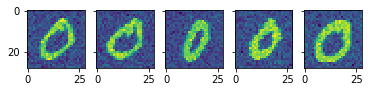

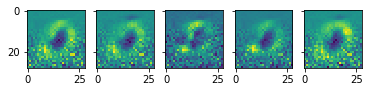

In [8]:
# Plot the original and reconstructed digits
X = train_data
#np.random.shuffle(X)
fig, ax = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, )
for i in range(5):
    img = X[i].reshape(28,28)
    ax[i].imshow(img, interpolation='nearest')
fig, ax = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, )
for i in range(5):
    img = Xhat[i].reshape(28,28)
    ax[i].imshow(img, interpolation='nearest')